In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# Set style for better-looking plots
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

# Display settings
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Load the data
df = pd.read_csv('../other files/starwars_filtered.csv')
print(f"Dataset loaded successfully!")
print(f"Total records: {len(df):,}")

Dataset loaded successfully!
Total records: 51,028


## 2. Data Overview

In [11]:
# First few rows
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51028 entries, 0 to 51027
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   figure          51028 non-null  object 
 1   authenticity_n  51028 non-null  int64  
 2   selling_price   51028 non-null  float64
 3   sales           51028 non-null  float64
 4   condition       51028 non-null  object 
 5   character_type  51028 non-null  object 
 6   year            51028 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 2.7+ MB


## 2. Price

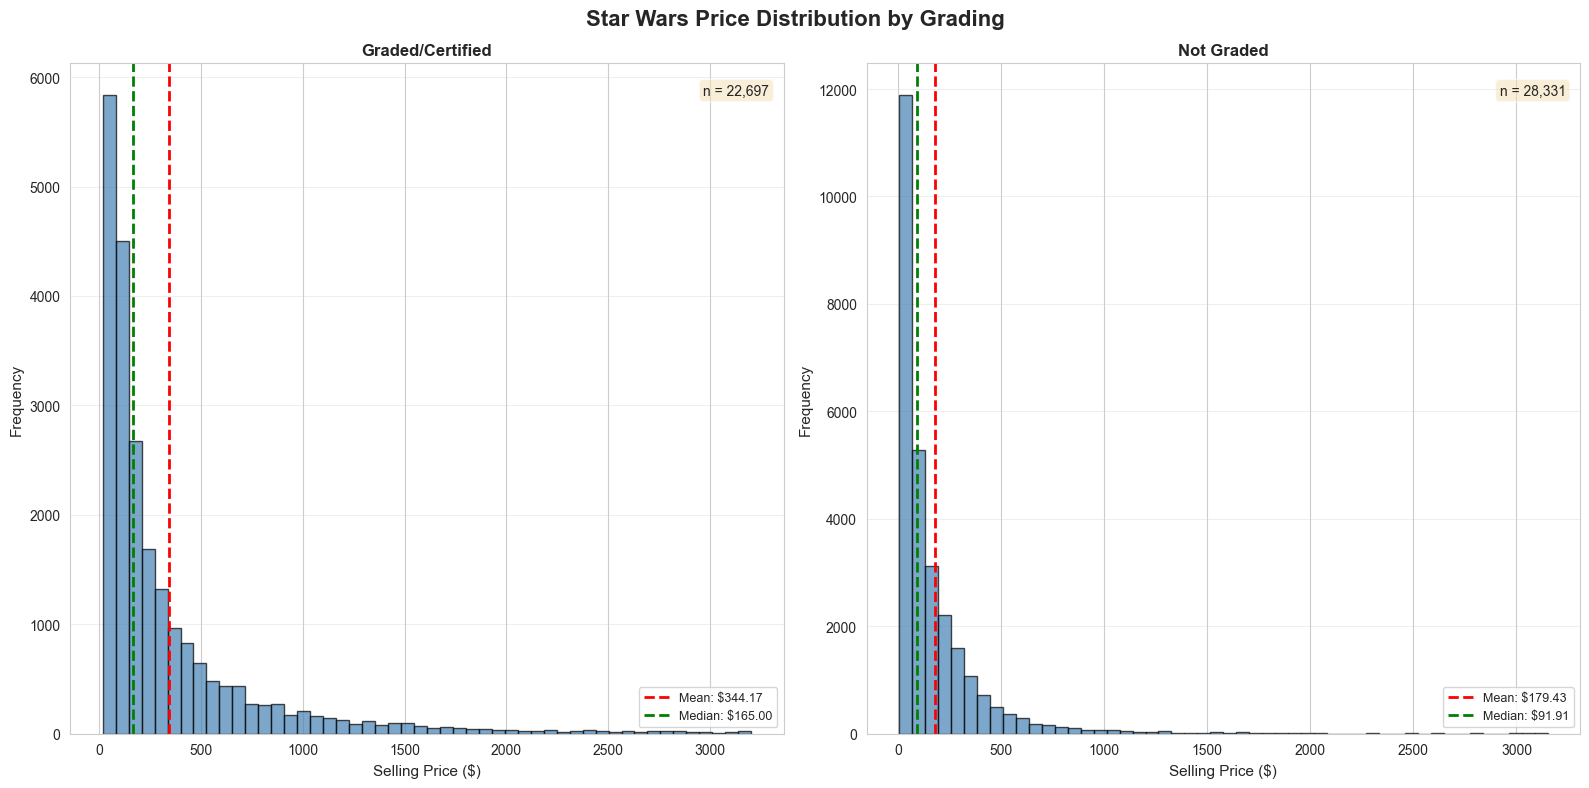

In [9]:
# Price Distribution by Grading/Certification
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Star Wars Price Distribution by Grading', fontsize=16, fontweight='bold')

# Define the combinations
combinations = [
    (1, 'Graded/Certified', axes[0]),
    (0, 'Not Graded', axes[1])
]

for auth, title, ax in combinations:
    # Filter data
    data = df[df['authenticity_n'] == auth]['selling_price']
    
    # Plot histogram
    ax.hist(data, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    ax.set_xlabel('Selling Price ($)', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(title, fontsize=12, fontweight='bold')
    
    # Add mean and median lines
    ax.axvline(data.mean(), color='red', linestyle='--', linewidth=2,
               label=f'Mean: ${data.mean():.2f}')
    ax.axvline(data.median(), color='green', linestyle='--', linewidth=2,
               label=f'Median: ${data.median():.2f}')
    
    # Add count annotation
    ax.text(0.98, 0.97, f'n = {len(data):,}', 
            transform=ax.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    ax.legend(fontsize=9)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Highest average price: Graded


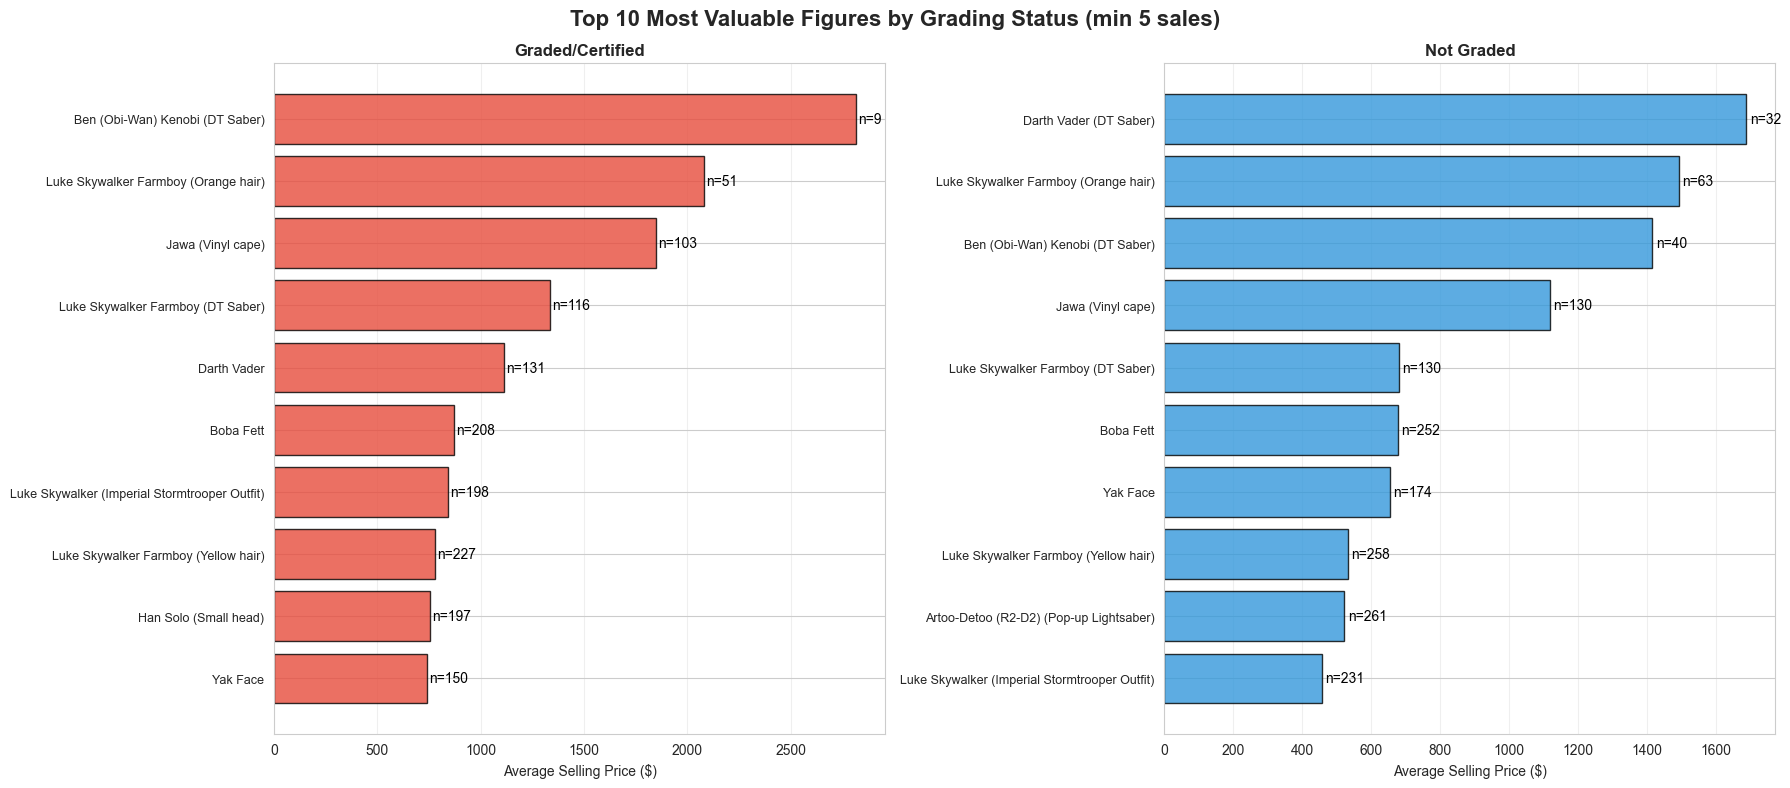


TOP 10 MOST VALUABLE FIGURES BY GRADING STATUS

Graded/Certified:
--------------------------------------------------------------------------------
   1. Ben (Obi-Wan) Kenobi (DT Saber)                    $2816.00 (n=  9)
   2. Luke Skywalker Farmboy (Orange hair)               $2082.43 (n= 51)
   3. Jawa (Vinyl cape)                                  $1848.92 (n=103)
   4. Luke Skywalker Farmboy (DT Saber)                  $1335.83 (n=116)
   5. Darth Vader                                        $1112.97 (n=131)
   6. Boba Fett                                          $ 868.45 (n=208)
   7. Luke Skywalker (Imperial Stormtrooper Outfit)      $ 839.90 (n=198)
   8. Luke Skywalker Farmboy (Yellow hair)               $ 780.70 (n=227)
   9. Han Solo (Small head)                              $ 754.86 (n=197)
  10. Yak Face                                           $ 737.83 (n=150)

Not Graded:
--------------------------------------------------------------------------------
   1. Darth Vader 

In [21]:
# Top 10 Most Valuable Figures by Grading Status
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Define the two combinations
combinations = [
    (1, 'Graded/Certified', axes[0], '#e74c3c'),
    (0, 'Not Graded', axes[1], '#3498db')
]

for auth, title, ax, color in combinations:
    # Filter data for this segment
    subset = df[df['authenticity_n'] == auth]
    
    # Get top 10 figures by average price (with at least 5 sales for reliability)
    figure_stats = subset.groupby('figure').agg({
        'selling_price': ['mean', 'count']
    })
    figure_stats.columns = ['avg_price', 'count']
    figure_stats = figure_stats[figure_stats['count'] >= 5]  # At least 5 sales
    top_10 = figure_stats.nlargest(10, 'avg_price')
    
    # Plot
    y_pos = np.arange(len(top_10))
    ax.barh(y_pos, top_10['avg_price'], color=color, alpha=0.8, edgecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_10.index, fontsize=9)
    ax.set_xlabel('Average Selling Price ($)', fontsize=10)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.invert_yaxis()
    ax.grid(axis='x', alpha=0.3)
    
    # Add count annotations
    for i, (idx, row) in enumerate(top_10.iterrows()):
        ax.text(row['avg_price'] + 10, i, f"n={int(row['count'])}", 
                va='center', fontsize=10, color='black')

fig.suptitle('Top 10 Most Valuable Figures by Grading Status (min 5 sales)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "="*80)
print("TOP 10 MOST VALUABLE FIGURES BY GRADING STATUS")
print("="*80)

for auth, title, _, _ in combinations:
    subset = df[df['authenticity_n'] == auth]
    
    figure_stats = subset.groupby('figure').agg({
        'selling_price': ['mean', 'median', 'count']
    })
    figure_stats.columns = ['avg_price', 'median_price', 'count']
    figure_stats = figure_stats[figure_stats['count'] >= 5]
    top_10 = figure_stats.nlargest(10, 'avg_price')
    
    print(f"\n{title}:")
    print("-" * 80)
    for i, (figure, row) in enumerate(top_10.iterrows(), 1):
        print(f"  {i:2d}. {figure[:50]:<50} ${row['avg_price']:7.2f} (n={int(row['count']):3d})")

print("\n" + "="*80)

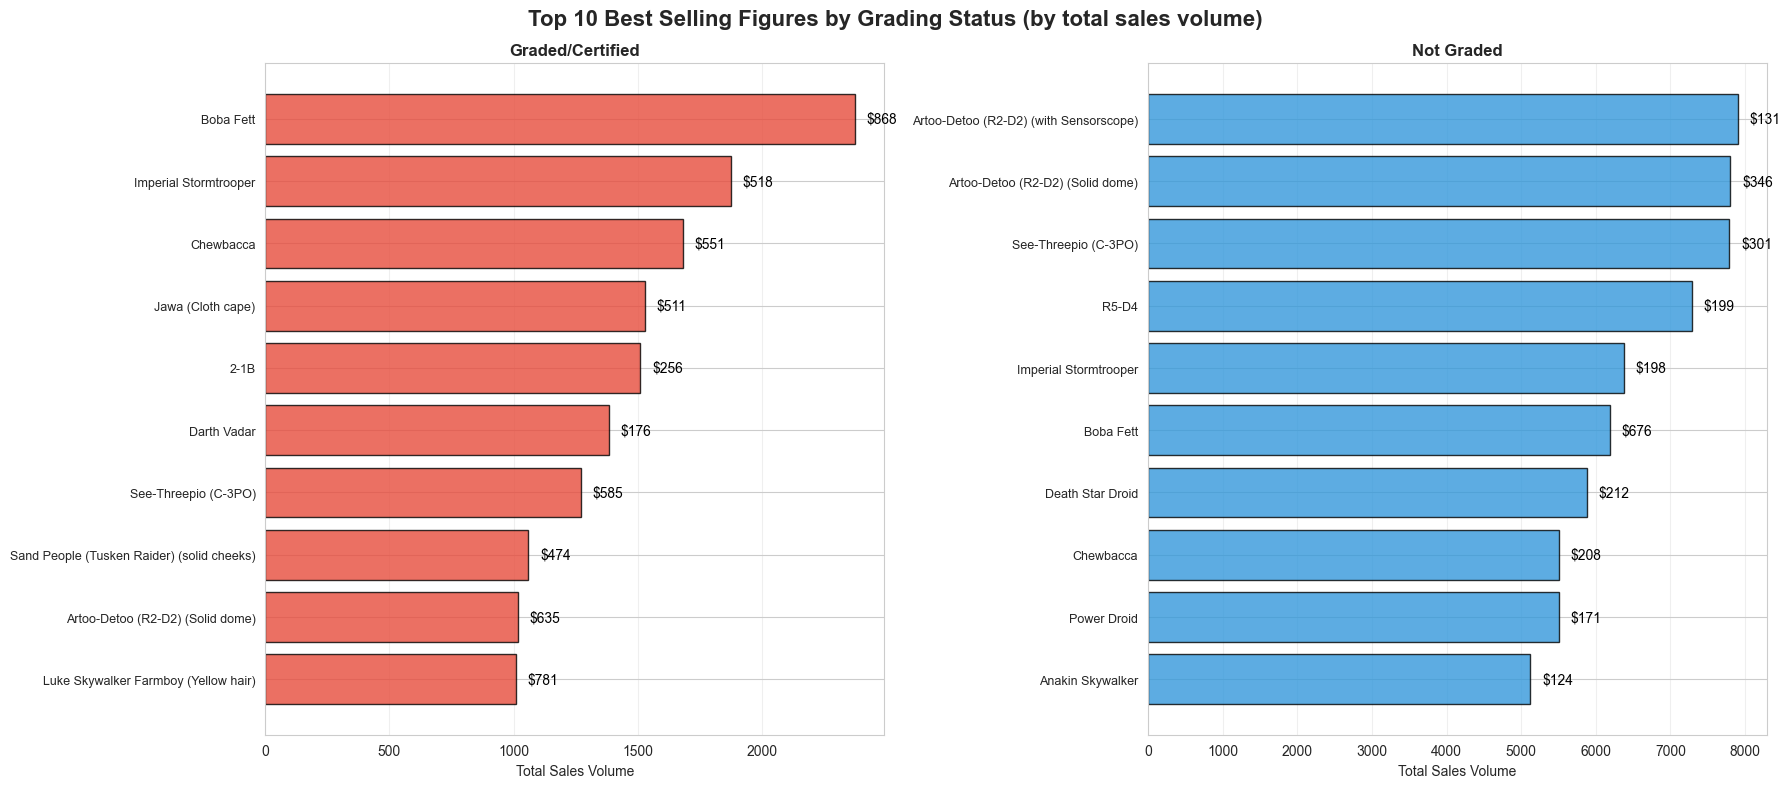


TOP 10 BEST SELLING FIGURES BY GRADING STATUS (by total sales volume)

Graded/Certified:
--------------------------------------------------------------------------------
   1. Boba Fett                                     Sales: 2375.8 (avg price: $ 868.45, 208 transactions)
   2. Imperial Stormtrooper                         Sales: 1876.0 (avg price: $ 518.24, 255 transactions)
   3. Chewbacca                                     Sales: 1683.0 (avg price: $ 551.22, 256 transactions)
   4. Jawa (Cloth cape)                             Sales: 1528.0 (avg price: $ 510.82, 252 transactions)
   5. 2-1B                                          Sales: 1511.0 (avg price: $ 255.81, 200 transactions)
   6. Darth Vadar                                   Sales: 1384.0 (avg price: $ 176.25, 128 transactions)
   7. See-Threepio (C-3PO)                          Sales: 1270.0 (avg price: $ 584.88, 250 transactions)
   8. Sand People (Tusken Raider) (solid cheeks)    Sales: 1059.0 (avg price: $ 473.93,

In [20]:
# Top 10 Best Selling Figures by Grading Status (by total sales volume)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Define the two combinations
combinations = [
    (1, 'Graded/Certified', axes[0], '#e74c3c'),
    (0, 'Not Graded', axes[1], '#3498db')
]

for auth, title, ax, color in combinations:
    # Filter data for this segment
    subset = df[df['authenticity_n'] == auth]
    
    # Get top 10 figures by SUMMING the 'sales' column (actual sales volume)
    figure_sales = subset.groupby('figure')['sales'].sum().sort_values(ascending=False).head(10)
    
    # Get average price for each of these top figures
    avg_prices = []
    for figure in figure_sales.index:
        avg_price = subset[subset['figure'] == figure]['selling_price'].mean()
        avg_prices.append(avg_price)
    
    # Create dataframe for plotting
    plot_data = pd.DataFrame({
        'figure': figure_sales.index,
        'total_sales': figure_sales.values,
        'avg_price': avg_prices
    })
    
    # Plot
    y_pos = np.arange(len(plot_data))
    bars = ax.barh(y_pos, plot_data['total_sales'], color=color, alpha=0.8, edgecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(plot_data['figure'], fontsize=9)
    ax.set_xlabel('Total Sales Volume', fontsize=10)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.invert_yaxis()
    ax.grid(axis='x', alpha=0.3)
    
    # Add average price annotations
    for i, (idx, row) in enumerate(plot_data.iterrows()):
        ax.text(row['total_sales'] + max(plot_data['total_sales'])*0.02, i, 
                f"${row['avg_price']:.0f}", 
                va='center', fontsize=10, color='black', fontweight='normal')

fig.suptitle('Top 10 Best Selling Figures by Grading Status (by total sales volume)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "="*80)
print("TOP 10 BEST SELLING FIGURES BY GRADING STATUS (by total sales volume)")
print("="*80)

for auth, title, _, _ in combinations:
    subset = df[df['authenticity_n'] == auth]
    
    # Sum the 'sales' column for each figure
    figure_sales = subset.groupby('figure')['sales'].sum().sort_values(ascending=False).head(10)
    
    print(f"\n{title}:")
    print("-" * 80)
    for i, (figure, total_sales) in enumerate(figure_sales.items(), 1):
        avg_price = subset[subset['figure'] == figure]['selling_price'].mean()
        num_transactions = len(subset[subset['figure'] == figure])
        print(f"  {i:2d}. {figure[:45]:<45} Sales: {total_sales:6.1f} (avg price: ${avg_price:7.2f}, {num_transactions:3d} transactions)")

print("\n" + "="*80)